# Spatial Imaging dv/v
spatial imaging by means of a diffusion-based sensitivity kernel (see Obermann, et al., 2013 and Pacheco and Snieder, 2005)

Implementation here is just for the 2D case

## open values computed from cascadia

### L Curve

2023-04-02T07:30:00.000000Z
[0.0005 0.001  0.002  0.004  0.008  0.016  0.032  0.064  0.128 ]
[0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]


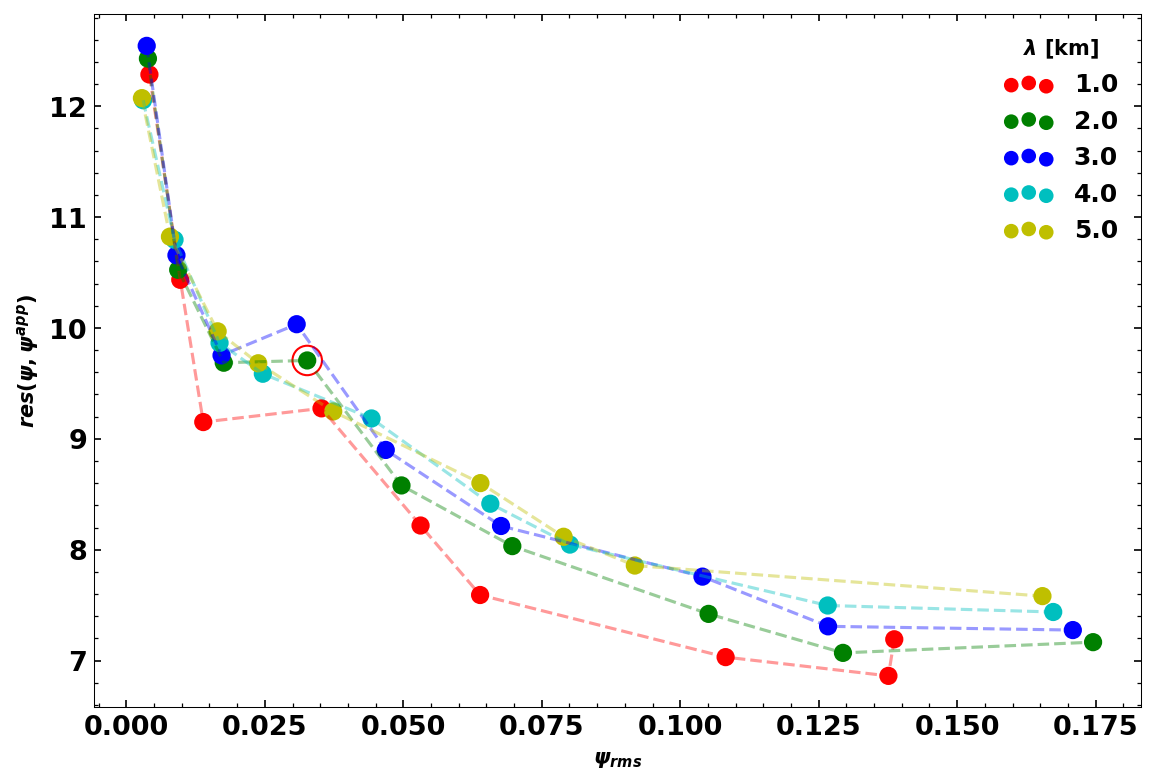

In [93]:
import glob
import os
from turtle import color, mode
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from obspy import UTCDateTime

from seismic.plot.plot_utils import set_mpl_params

filename = 'Lcurve_1.0'  # input and output

lc = np.load(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_tdependent_lcurve_singlecross_allcc_filtereddv/{filename}.npz')
outfolder = '/home/pm/Documents_sync/PhD/StHelens/spatial/figures/lcurves/linearised/'
os.makedirs(outfolder, exist_ok=True)
corrl_grid = lc['corr_len']
stdg = lc['std_model']

residual = lc['residual']
model_variance = lc['model_variances']

rms = np.nanmean(lc['vel_change']**2, axis=(1, 2))**0.5


times = lc['times']
vel_change = lc['vel_change']

print(UTCDateTime(times[-2]))

print(np.unique(stdg))

set_mpl_params()

# 6 colours, 5 shapes
plt.figure(figsize=(9, 6))
ax = plt.gca()

ii = corrl_grid >= 1


# rms_to_plot = np.nanmedian(rms, axis=-1)
rms_to_plot = rms[...,-2]
# residual_to_plot = np.nanmedian(residual, axis=-1)
residual_to_plot = residual[...,-2]

markerdict = {k: v for k, v in zip(np.sort(np.unique(stdg)), ['o', 's', 'v', '^', 'D', 'P', 'X', 'h', 'd', '*'])}
colorlist = ['r', 'g', 'b', 'c', 'y'] #, 'k', 'w']
colordict = {k: v for k, v in zip(np.sort(np.unique(corrl_grid)), ['r', 'g', 'k', 'c', 'y', 'm', 'b', 'w', 'orange', 'purple'])}
print(list(colordict.keys()))
# actually mathematically correct is to plot the L2 norm of the model
# against the L2 norm of the residual
for stdm in np.sort(np.unique(stdg)):
    # for color choose color from rainbow scale
    # plt.plot(
    #     rms_to_plot[np.all((stdg==stdm, ii), axis=0)],
    #     residual_to_plot[np.all((stdg==stdm, ii), axis=0)],
    #     linestyle='--', color=colorlist,
    #     alpha=0.4)
    scatter = plt.scatter(
        rms_to_plot[np.all((stdg==stdm, ii), axis=0)],
        residual_to_plot[np.all((stdg==stdm, ii), axis=0)],
        # c=np.array(corrl_grid)[np.all((stdg==stdm, ii), axis=0)],
        c=colorlist,
        s=60,
        # marker=markerdict[stdm],
        marker='o')

# sort by RMS and residual by increasing rms to plot line
# arrinds = np.argsort(rms_to_plot)
# plt.plot(
#     np.sort(rms_to_plot),
#     residual_to_plot[arrinds],
#     linestyle='--', color='k', alpha=0.4)

# plt.plot(
#     rms_to_plot,
#     residual_to_plot,
#     linestyle='--', color='k', alpha=0.4)


# produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Correlation Length [km]")
# handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
# legend1 = ax.legend(handles, labels, loc="upper right", title="Correlation Length [km]")
# ax.add_artist(legend1)

# connect point belonging to same corr_len
for jj, corrl in enumerate(np.sort(np.unique(corrl_grid[ii]))):
    plt.plot(
        rms_to_plot[np.all((corrl_grid==corrl, ii), axis=0)],
        residual_to_plot[np.all((corrl_grid==corrl, ii), axis=0)],
        linestyle='--', color=colorlist[jj],
        alpha=0.4
    )
    plt.scatter(np.nan, np.nan, color=colorlist[jj], label=corrl)
plt.legend(loc='upper right', title=r"$\lambda$ [km]")


# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# plt.legend(loc='upper right', title=r"$\sigma_{model}$")

scatter = plt.scatter(
    rms_to_plot[np.all((stdg==0.004, corrl_grid==2), axis=0)],
    residual_to_plot[np.all((stdg==0.004, corrl_grid==2), axis=0)],
    edgecolors='r', s=200, facecolors='none', marker='o')

plt.ylabel(r'$res(\psi, \psi^{app})$')
# plt.xlabel(r'$\tilde\sigma_{dv/v}$')
plt.xlabel(r'$\psi_{rms}$')

# plt.xlim((0, None))
plt.savefig(f'{outfolder}/{filename}.pdf', bbox_inches='tight', facecolor='None')

(63, 36, 34, 67) (63,)


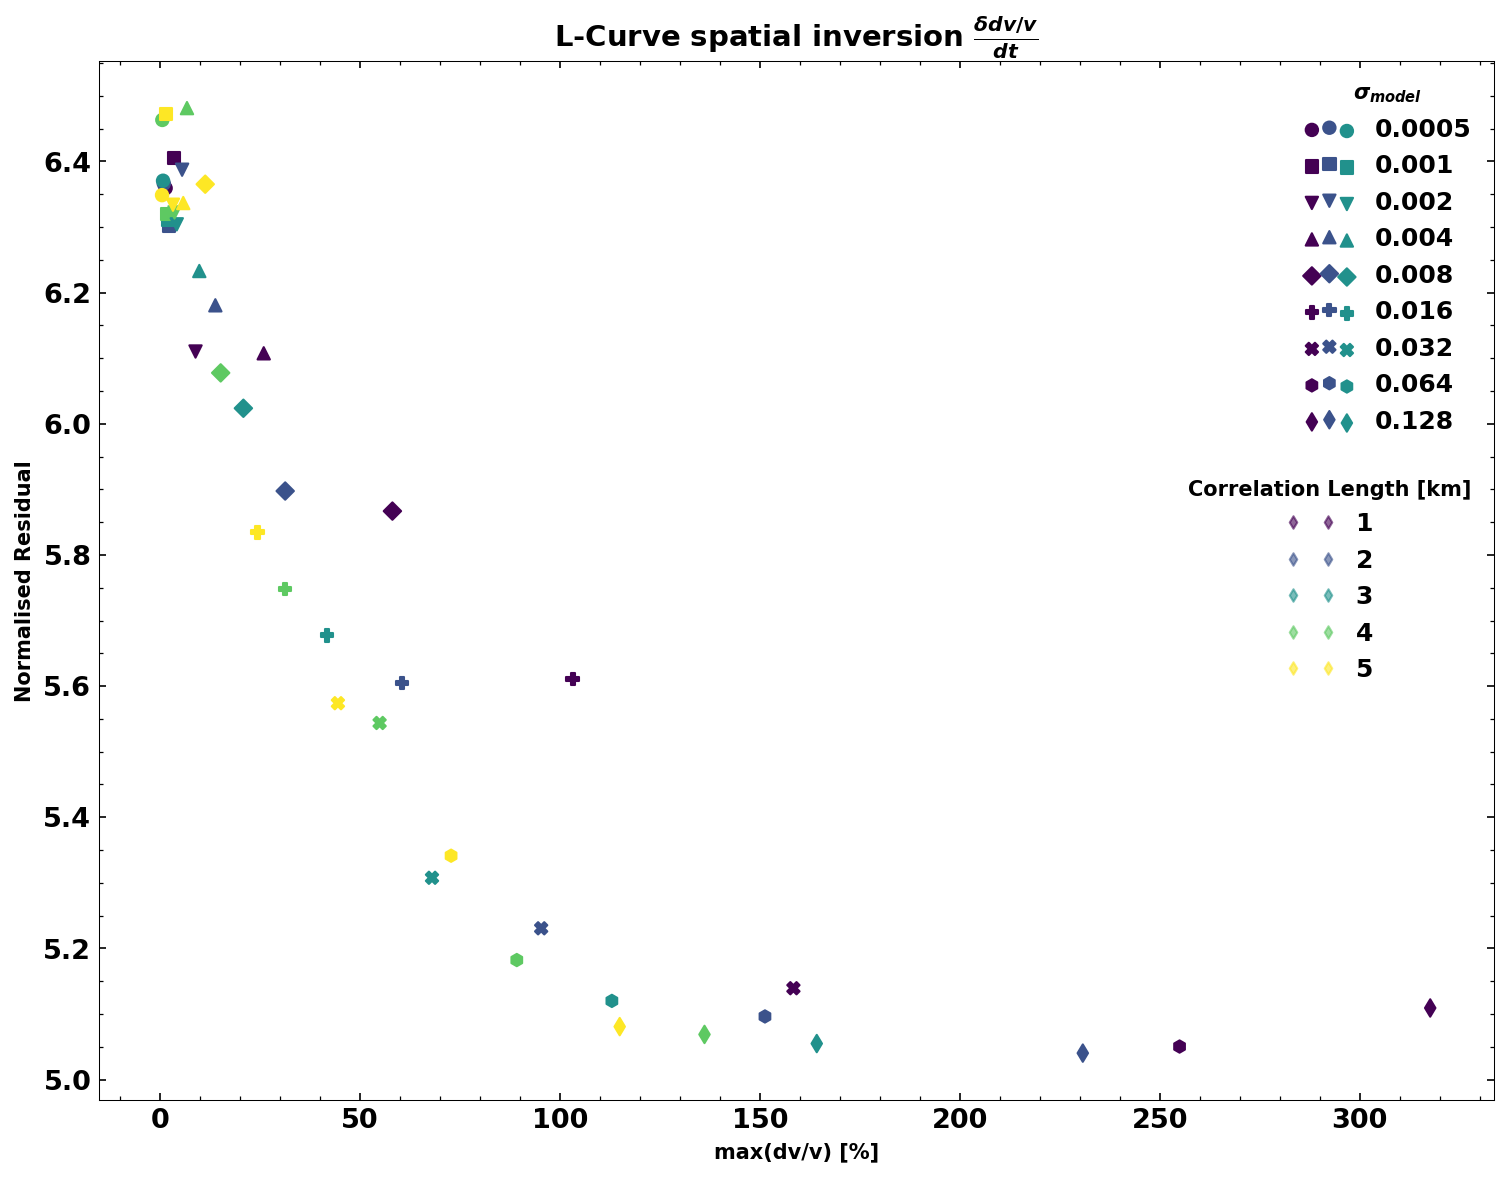

In [32]:

# 6 colours, 5 shapes
print(vel_change.shape, stdg.shape)
# here we plot the abs max of vel_change
ii = corrl_grid >=1
vel_change_max = np.max(np.reshape(abs(np.nan_to_num(vel_change)), (vel_change.shape[0], -1)), axis=-1)
plt.figure(figsize=(12, 9))
ax = plt.gca()
markerdict = {k: v for k, v in zip(np.sort(np.unique(stdg)), ['o', 's', 'v', '^', 'D', 'P', 'X', 'h', 'd', '*'])}

for stdm in np.sort(np.unique(stdg[ii])):
    scatter = plt.scatter(
        vel_change_max[np.all((stdg==stdm, ii), axis=0)]*100,
        np.nanmedian(residual, axis=-1)[np.all((stdg==stdm, ii), axis=0)],
        s=35,
        marker=markerdict[stdm], label=stdm,
        c=np.array(corrl_grid)[np.all((stdg==stdm, ii), axis=0)])



# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Correlation Length [km]")
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
plt.legend(loc='upper right', title=r"$\sigma_{model}$")

# plt.xlim((0, 10))

# change plot to log-log
# plt.xscale('log')
# plt.yscale('log')

plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
plt.ylabel('Normalised Residual')
plt.xlabel('max(dv/v) [%]')
plt.savefig(f'{outfolder}/{filename}_velchange.pdf', bbox_inches='tight', facecolor='None')

In [23]:
# Time dependent Lcurve
import os

from obspy import UTCDateTime

outfolder = os.path.join(outfolder,'tdependent')
os.makedirs(outfolder, exist_ok=True)


for ii, time in enumerate(times):
    if np.all(np.isnan(residual[:, ii])):
        continue
    # if np.all(residual[:, ii]==0):
    #     continue
    plt.figure(figsize=(12, 9))
    ax = plt.gca()
    # actually mathematically correct is to plot the L2 norm of the model
    # against the L2 norm of the residual
    # scatter = plt.scatter(np.sqrt(np.mean(vel_change_total**2, axis=-1)), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)

    # plot with varying markers
    for stdm in np.sort(np.unique(stdg)):
        scatter = plt.scatter(
            model_variance[stdg==stdm][:,ii], residual[stdg==stdm][:,ii],
            c=np.array(corrl_grid)[stdg==stdm], s=35, marker=markerdict[stdm],
            label=stdm)


    # # 3. plot that point
    # plt.scatter(xq[max_curvature], fit_func(xq[max_curvature], *popt), marker='x', s=100, color='red', alpha=.5)

    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Correlation Length [km]")
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
    ax.add_artist(legend1)

    # produce a legend with a cross-section of sizes from the scatter
    plt.legend(loc='upper right', title=r"$\sigma_{model}$")

    # handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    # legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
    plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
    plt.ylabel('Normalised Residual')
    plt.xlabel('Standard deviation dv/v')
    # plot log log
    # plt.xscale('log')
    # plt.yscale('log')
    # plt.xlim((0, None))
    plt.savefig(
        f'{outfolder}/{filename}_{UTCDateTime(time)}.png',
        bbox_inches='tight', facecolor='None', dpi=200)
    plt.close()

### Gridded Time-Series

In [9]:
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime
from scipy.signal import butter, sosfiltfilt, detrend




freq0 = 1.0
corr_len = 2
std_model = 0.004

infile = glob.glob(
    f'/home/pm/Documents_sync/PhD/StHelens/spatial/linearised/new_gap_handling_crosssingle_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-*/dvdt_3D.npz')[0]

outfolder = os.path.join(os.path.dirname(os.path.dirname(infile)), 'figures')
os.makedirs(outfolder, exist_ok=True)

loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
print(t[1]-t[0])
dvdt = loaded['dv']
# Filter requirements.
# order = 6
# fs = 1/np.median(np.diff(t))       # sample rate, Hz
# cutoff = 1/250  # desired cutoff frequency of the filter, Hz
# # Get the filter coefficients so we can check its frequency response.
# sos = butter(order, cutoff, btype='high', analog=False, output='sos', fs=1)
# # extract the linear trend and keep it
# dvdt = np.nan_to_num(dvdt)
# trend = dvdt - detrend(dvdt, axis=-1)


# dvdt = sosfiltfilt(sos, np.nan_to_num(dvdt), axis=-1)
# dvdt += trend

statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
start = np.argmin(abs(t - UTCDateTime('2007-06-01').timestamp))
end = np.argmin(abs(t - UTCDateTime('2023-06-01').timestamp))

# end = -4
print(UTCDateTime(t[start]), UTCDateTime(t[end]))
# note that this are rows -> latitude, columns -> longitude, pages -> time
dvdt = dvdt[:,:,start:-1]
t = t[start:-1]
try:
    res = loaded['resolution']
except KeyError:
    res = None
# t = t[start:end]

# Integrate to plot dv/v
# trapz doesn't work with nans
# options
# 1. manual integration
# 2. replace nans with interpolation? Otherwise this is probably not correct
# 
nani = ~np.isnan(dvdt[0,0,:])
# We start here to have February to February

dv_total = dvdt[:, :, -1]
dv = np.nan_to_num(dvdt)


# minmax
# dv_total = -abs(dv.max(axis=-1)-dv.min(axis=-1))

# # # seasonal
# # # average of change from January to July is <7 and the other is >6
# # Probably necessary to do a linear detrend to make sense of this
# # for detrend just remove the mean of the derivative
# dvdt_demean = dvdt - np.reshape(np.nanmean(dvdt, axis=-1), (36, 34, 1))
utcs = [UTCDateTime(tt) for tt in t]
datetimes = [utci.datetime for utci in utcs]


# Name suffix for output figure
output_param = 'total'

# dvdt = np.nan_to_num(dvdt)

432000.0
2007-05-31T00:00:00.000000Z 2023-06-01T00:00:00.000000Z


### Show dv/v time series at one point

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


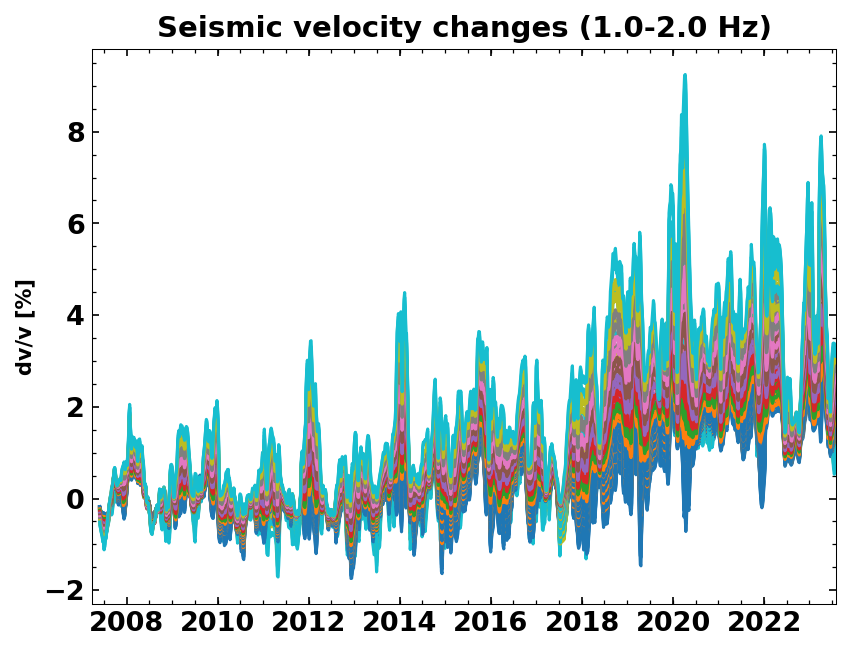

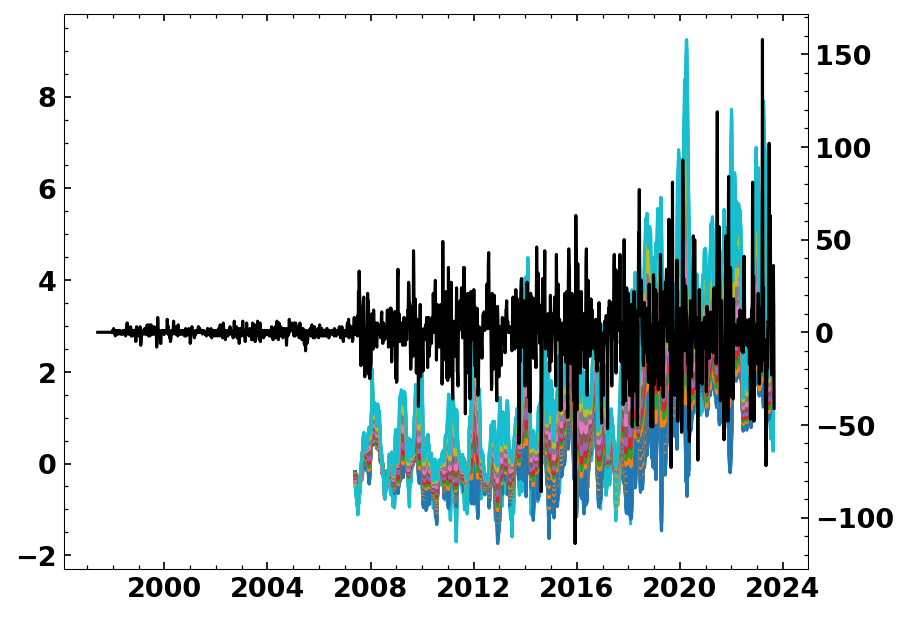

In [56]:
import datetime
# load numpy archives with data availability
loaded= np.load(f'/home/pm/Documents_sync/PhD/StHelens/dv/new_gap_handling/availability_{freq0}.npz', allow_pickle=True)
avail_t = loaded['t']
avail_n = loaded['n']

avail_nd = np.hstack((0, np.diff(avail_n)))
# remove the peak at the end
avail_nd[np.argmin(avail_nd)] = 0

# plt.plot(datetimes, -100*dv[17, 20, :], label='MSH summit')
# plt.plot(datetimes, -100*dv[20, 12, :], label='loc of maximum dv/v increase')
for ii in range(10):
    ii += 10
    for jj in range(10):
        jj += 10
        plt.plot(datetimes, -100*dv[ii, jj, :])
ax1 = plt.gca()
# plot data availability as bars on second y axis


# ax2.set_ylim([0, 500])
# ax1.set_ylim([-3, 4])

plt.xlim([datetime.datetime(2007, 4, 1), datetime.datetime(2023, 8, 1)])
ax1.set_ylabel('dv/v [%]')
plt.title(f'Seismic velocity changes ({freq0}-{freq0*2} Hz)')
plt.legend()

plt.savefig(os.path.join(outfolder, f'dvv1d_{freq0}.pdf'), bbox_inches='tight', transparent=True)

plt.figure()
for ii in range(10):
    ii += 10
    for jj in range(10):
        jj += 10
        plt.plot(datetimes, -100*dvdt[ii, jj, :])
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(avail_t, avail_nd, color='k')

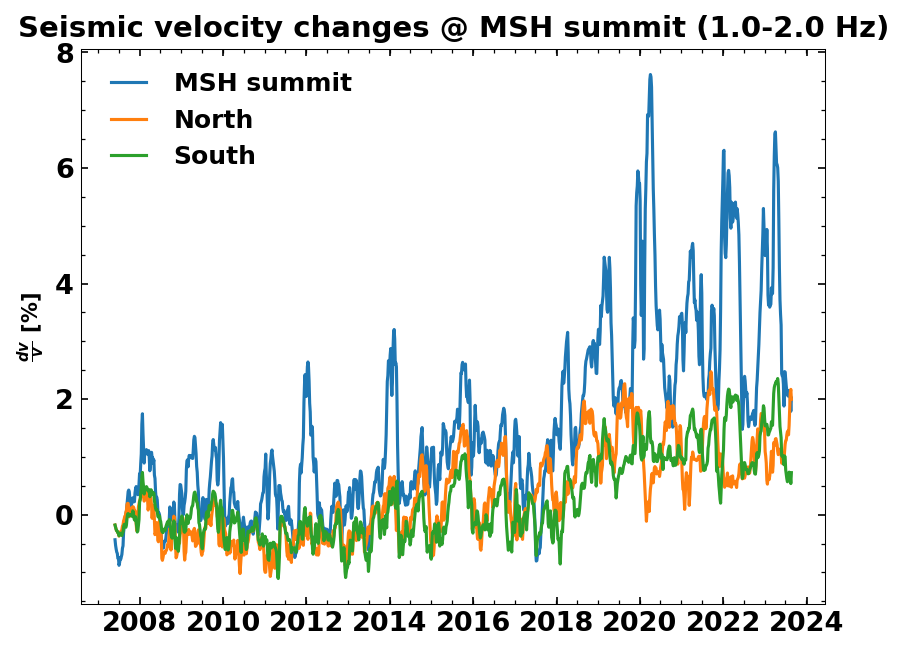

In [57]:
from seismic.plot.plot_utils import set_mpl_params
set_mpl_params()

plt.plot(datetimes, -100*dv[15, 19, :], label='MSH summit')
plt.plot(datetimes, -100*dv[dv.shape[0]-4, dv.shape[1]//2], label='North')
plt.plot(datetimes, -100*dv[4, dv.shape[1]//2], label='South')
plt.ylabel(r'$\frac{dv}{v}$ [%]')
plt.title(f'Seismic velocity changes @ MSH summit ({freq0}-{freq0*2} Hz)')
plt.legend()
plt.savefig(os.path.join(outfolder, f'dvv1d_{freq0}_summit.png'), dpi=300, bbox_inches='tight', transparent=True)


(-2.0, 2.0)

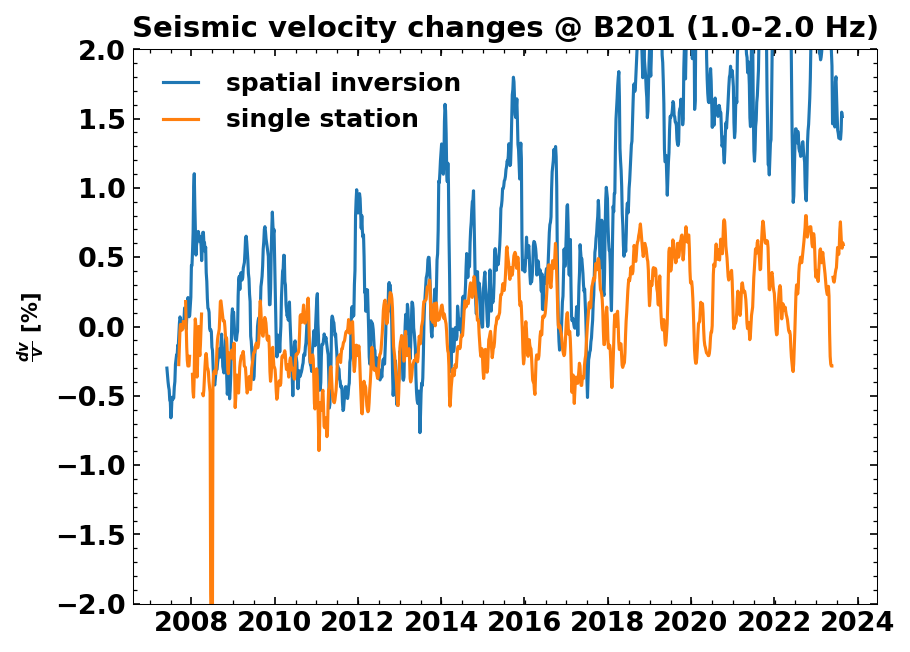

In [58]:
import dateutil
from seismic.monitor.dv import read_dv
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2deg
from seismic.monitor.spatial import geo2cart

# compare to single station result from PB B201 EH1-EH2
infile = f'/home/pm/Documents_sync/PhD/StHelens/dv/new_gap_handling/betweenComponents*_{freq0}-{freq0*2}*/DV-PB-PB.B201-B201.EH1-EH2.npz'
dv_single = read_dv(infile)[0]
# Find coordinates on the grid

stla = dv_single.stats.stla
stlo = dv_single.stats.stlo
stx, sty = geo2cart(stla, stlo, 46.05, -122.45)
# Find the closest grid point
ix = np.argmin(abs(stx-x))
iy = np.argmin(abs(sty-y))

plt.plot(datetimes, -100*dv[ix, iy, :], label='spatial inversion')
plt.plot(
    [_t.datetime for _t in dv_single.stats.corr_start], -100*dv_single.value,
    label='single station')
plt.legend()
plt.ylabel(r'$\frac{dv}{v}$ [%]')
plt.title(f'Seismic velocity changes @ B201 ({freq0}-{freq0*2} Hz)')
plt.savefig(os.path.join(outfolder, f'dvv1d_{freq0}_B201.png'), dpi=300, bbox_inches='tight', transparent=True)
plt.ylim((-2, 2))


In [59]:
# do the same as above but with a forward inversion onto this station
from seismic.monitor.spatial import DVGrid
from obspy.geodetics import degrees2kilometers, locations2degrees
lat = [46.05, 46.36]
lon = [-122.45, -122.03]



dvg = DVGrid(
    lat0=min(lat), lon0=min(lon), res=1,
    y=degrees2kilometers(lat[1] - lat[0]),
    x=degrees2kilometers(locations2degrees(lat[0], lon[0], lat[0], lon[1])),
    dt=0.05, vel=2.5, mf_path=2.5/(2*np.pi*0.0014*3))

forw_vals = []
utc_single = []

for ii, utc in enumerate(utcs):
    try:
        forw_vals.append(
            dvg.forward_model(dv[:, :, ii], [dv_single], utc))
        utc_single.append(utc)
    except IndexError:
        continue

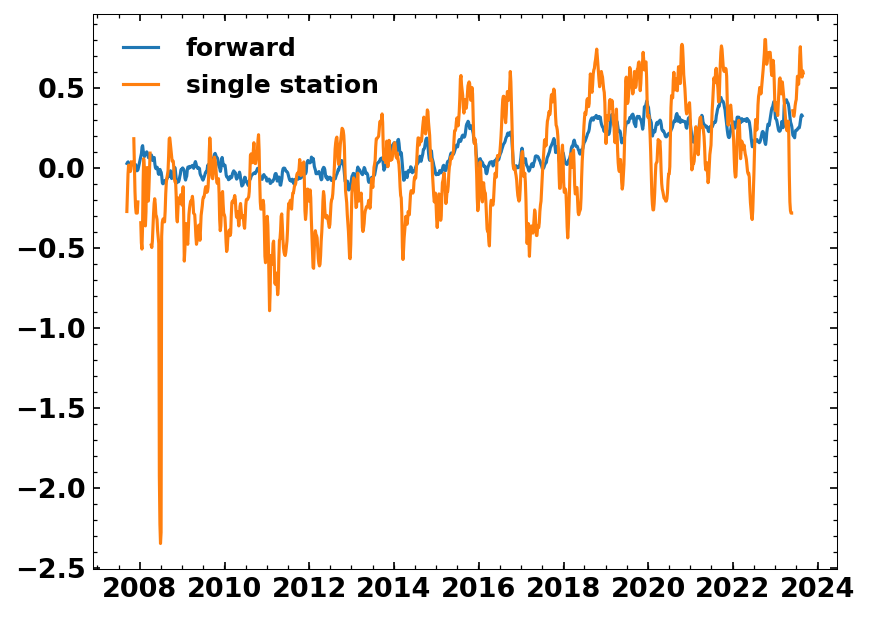

In [60]:
plt.plot([_t.datetime for _t in utc_single], -100*np.array(forw_vals), label='forward')
plt.plot(
    [_t.datetime for _t in dv_single.stats.corr_start], -100*dv_single.value,
    label='single station')
plt.savefig(os.path.join(outfolder, f'dvv1d_forward_{freq0}_B201.png'), dpi=300, bbox_inches='tight', transparent=True)
plt.legend()

Text(0.5, 1.0, 'seismic velocity on a pixel')

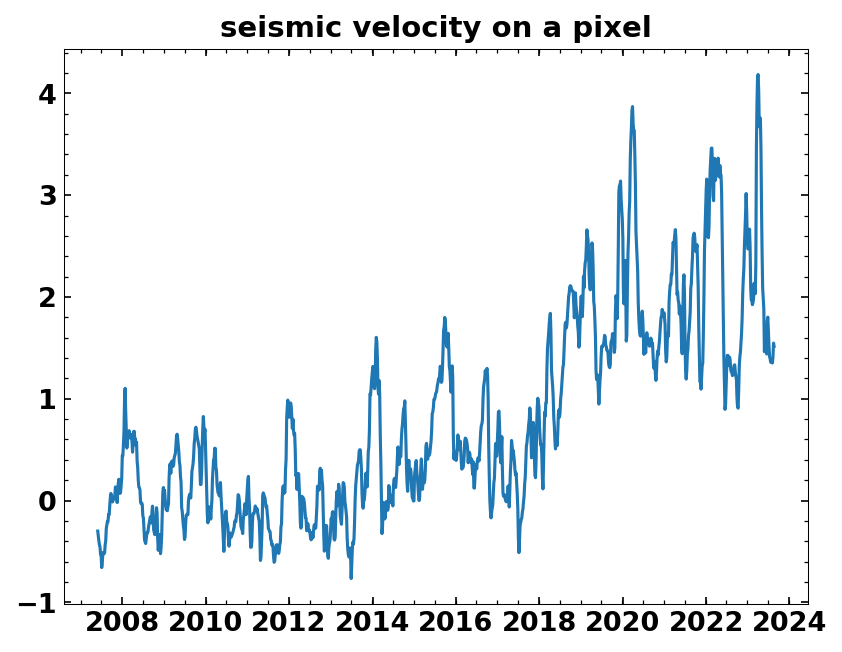

In [61]:
plt.plot(datetimes, -100*dv[ix, iy, :], label='spatial inversion')
plt.title('seismic velocity on a pixel')

#### Plot this using PyGMT

In [62]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt

lat0 = 46.05
lat = km2d(y) + lat0
lat0 = lat.min()
lon0 = -122.45 # -122.34
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="03s", region=region)
# topo is returned as lines are latitude and columns longitude


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.021666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.365


In [63]:
from scipy.interpolate import RegularGridInterpolator

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data


lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])

f = RegularGridInterpolator((lat, lon), dv_total, bounds_error=False, method='linear')


# mark the pixels that we use for the 1D comparisons
m = dv_total.shape[0]-4
n = dv_total.shape[1]//2

m2 = 15
n2 = 19

dv_totalint = f(qcoords)
dv_totalint = dv_totalint.reshape(latqg.shape)

dv_total_grid = DataArray(data=dv_totalint*-100, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')

In [64]:
# pygmt.config() #'13p')
import os
import pandas as pd

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)


fig = pygmt.Figure()
# create colorbar for xarray.DataArray
absmax = np.max(abs(dv_total))
pygmt.makecpt(
    # cmap="red,white,blue",
    cmap='batlow',
    series=f"{-dv_total.max()*100}/{absmax*100+.01}",
    continuous=True,
    reverse=False,
)

persp = [160, 30] #40
persp = [180, 90] #40

proj = "M30c"

cb_tick_increment = round(
    (dv_total.max() - dv_total.min())*100/7,
    int(-np.floor(np.log10(100*(dv_total.max() - dv_total.min()))) + 1))

surftype = 'i'
with pygmt.config(
    MAP_FRAME_TYPE='fancy+',# FORMAT_GEO_MAP='ddd.xx',
    # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
    # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
    # MAP_TICK_LENGTH_PRIMARY=0.5,
    # MAP_TICK_LENGTH_SECONDARY=0.5,
    # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
    # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
    dgrid = pygmt.grdgradient(grid=topo, radiance=[270, 1])
    # add contour lines
    
    fig.grdimage(
        grid=dv_total_grid,
        # Sets the view azimuth as 130 degrees, and the view elevation as 30
        # degrees
        perspective=persp, #160 50
        region=region,
        # Sets the x- and y-axis labels, and annotates the west, south, and east
        # axes
        # frame=["xa", "ya", "WSnE"],
        frame='a',
        # shading=dgrid,
        # surftype='sm',#m0.01p',
        # cmap='rainbow',
        # plane="2000+gblack",
        # Sets a Mercator projection on a 15-centimeter figure
        projection=proj,
        # Sets the height of the three-dimensional relief centimeters
        # meshpen="0,150",
        transparency=30,
        interpolation='n'
    )
    fig.grdcontour(
        annotation=500,
        interval=250,
        grid=topo,
    )
    fig.colorbar(frame=[f'a{cb_tick_increment}', "x+ldv/v", "y+l[%]"], projection=proj)
    fig.plot(
        x=stats.Longitude, y=stats.Latitude, style="i0.7c", color="red", pen="black", transparency=25, projection=proj)
    # plot st helens seismic zone
    fig.plot(
        # region=[0, 10, 0, 10],
        # projection="X15c/10c",
        # frame="a",
        x=[-122.19, -122.26],
        y=[46.21, 46.4],
        pen="1.5p,black",
    )
    # plot a box around the pixel areas around m and n
    # and fill it
    fig.plot(
        x=[lon[n], lon[n], lon[n+1], lon[n+1], lon[n]],
        y=[lat[m], lat[m+1], lat[m+1], lat[m], lat[m]],
        pen="1.5p,black", color="black", transparency=50,
    )
    fig.plot(
        x=[lon[n2], lon[n2], lon[n2+1], lon[n2+1], lon[n2]],
        y=[lat[m2], lat[m2+1], lat[m2+1], lat[m2], lat[m2]],
        pen="1.5p,black", color="cyan", transparency=50,
    )
    fig.text(text='SHZ', angle=-72, x=-122.225, y=46.32, font='Helvetica-Bold', justify='LM', offset='0.2c')
fig.savefig(f'{outfolder}/dvv_map_{output_param}_{freq0}-{freq0*2}_{surftype}_contour075.png', dpi=300, transparent=True)

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


In [65]:
raise ValueError

ValueError: 

## dv/v time series video

In [10]:
# get events
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.core.event.catalog import Catalog
import numpy as np
from obspy import read_events


minmag = 0
try:
    evts = read_events(f'MSH_events_minmag{minmag}.xml')
except FileNotFoundError:
    c = Client('USGS', timeout=240)

    lat = [45.95, 46.45]
    lon = [-122.45, -121.96]


    starttime = UTCDateTime(year=2007, julday=1)
    endtime = UTCDateTime(year=2023, julday=300)
    delta = 86400*365
    rtimes = np.linspace(starttime.timestamp, endtime.timestamp, 12)
    # rtimes = np.arange(starttime.timestamp, endtime.timestamp, delta)
    evts = Catalog()



    for ii, rtime in enumerate(rtimes):
        if ii == len(rtimes)-1:
            break
        start = UTCDateTime(rtime)
        end = UTCDateTime(rtimes[ii+1])
        print(f'downloading events from {start} to {end}')
        evts.extend(c.get_events(
            starttime=start, endtime=end, minmagnitude=minmag, maxdepth=15,
            minlatitude=lat[0], maxlatitude=lat[1], minlongitude=lon[0],
            maxlongitude=lon[1]))
    evts.write(f'MSH_events_minmag{minmag}.xml', format='QUAKEML')

otimes = [evt.preferred_origin().time.datetime for evt in evts]
hypz = [-evt.preferred_origin().depth for evt in evts]
hyplats = [evt.preferred_origin().latitude for evt in evts]
hyplons = [evt.preferred_origin().longitude for evt in evts]

In [11]:
import os
import glob
import pandas as pd
import datetime
import numpy as np

from obspy import UTCDateTime

infiles = glob.glob('/home/pm/Documents_sync/PhD/StHelens/gnss_cleaned/USGS/*U.data')
coord_file = '/home/pm/Documents_sync/PhD/StHelens/gnss_cleaned/coords.txt'
df_coords = pd.read_csv(
    coord_file, delim_whitespace=True, skipinitialspace=True, names=('station', 'lat', 'lon', 'elevation'))

positions = {}


for infile in infiles:
    # retrieve station name
    station = os.path.basename(infile).split('.')[0].split('_')[0].upper()
    # retrieve GPS position and time dependent height
    # create new date column
    df = pd.read_csv(
        infile, delim_whitespace=True,
        skipinitialspace=True, usecols=(1, 2, 3, 4),
        names=('offset', 'std', 'year', 'doy'))
    
    # convert year and doy to date
    df['t'] = [UTCDateTime(
        year=int(y), julday=int(jd)) for y, jd in zip(df['year'], df['doy'])]
    # compute velocity m/day
    df['velocity'] = df['offset'].diff() / (df['t'].diff()*24*3600)
    df['velocity'] = df['velocity'].rolling(365, center=True).mean()
    df['datetime'] = [x.datetime for x in df['t']]
    # Remove last 15 rows
    # smooth offset
    df['offset'] = df['offset'].rolling(60, center=True).mean()
    df['offset'] /= 1000 # convert to meters
    df = df[:-30]
    try:
        df['lat'] = df_coords['lat'][df_coords['station'] == station].values[0]
        df['lon'] = df_coords['lon'][df_coords['station'] == station].values[0]
        df['elevation'] = df_coords['elevation'][df_coords['station'] == station].values[0]
    except IndexError:
        print(station, ' no coords found')
        continue
    # set offset to zero where t is closest to 2007-01-01
    if min(abs(df['t'] - UTCDateTime(2007, 7, 1))) > 30*3600:
        print(station, ' is not available')
        continue
    argmin = np.argmin(abs(df['t'] - UTCDateTime(2007, 7, 1)))
    df['offset'] = df['offset'] - df['offset'][argmin]
    positions[station] = df

TSEP  is not available
SEPR  is not available


In [12]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt

lat0 = 46.05
lat = km2d(y) + lat0
lat0 = lat.min()
lon0 = -122.45 # -122.34
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="03s", region=region)
# topo is returned as lines are latitude and columns longitude


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.021666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.365


In [13]:
# pygmt.config() #'13p')
import os
import datetime
from turtle import position
import pandas as pd
from scipy.interpolate import RegularGridInterpolator

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)
stats['starttime'] = [UTCDateTime(s).datetime for s in stats.StartTime]
stats['endtime'] = [UTCDateTime(s).datetime for s in stats.EndTime]

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data
lonq = np.linspace(lonq.min(), lonq.max(), 102)
latq = np.linspace(latq.min(), latq.max(), 75)
lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])


# create colorbar for xarray.DataArray
absmax = np.max(abs(dv))
# pygmt.makecpt(
#     cmap='batlow',#"red,white,blue",
#     # series=f"0/{absmax*100+.01}",
#     continuous=True,
#     reverse=False,
# )

persp = [160, 60] #40
proj = "M30c"

# cb_tick_increment = round(
#     (dv.max() - dv.min())*100/7,
#     int(-np.floor(np.log10(100*(dv.max() - dv.min()))) + 1))
# cb_tick_increment = 0.1

surftype = 'sm'
for date in datetimes[::4]:
    outfile = f'{outfolder}/video_{freq0}/{date}.jpg'
    if os.path.exists(outfile):
        continue
    fig = pygmt.Figure()
    ii = np.argmin(abs(date - np.array(datetimes)))
    f = RegularGridInterpolator(
        (lat, lon), dv[:, :, ii], bounds_error=False, method='linear', fill_value=0)

    

    dv_totalint = f(qcoords)
    dv_totalint = dv_totalint.reshape(latqg.shape)

    dv_grid = DataArray(data=np.squeeze(dv_totalint)*-100, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')
    # dv_grid = DataArray(data=np.squeeze(dv[:, :, ii])*-100, coords={'lon': lon, 'lat': lat}, dims=('lat', 'lon'), name='dv/v')
    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', # FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        dgrid = pygmt.grdgradient(grid=topo, radiance=[270, 1])
        pygmt.makecpt(cmap="batlow", series=[-100*dv.max(), -100*dv.min()])

        fig.grdimage(
            grid=dv_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            #frame=["xa", "ya", "WSnE"],
            frame=['a', f'+t{date.strftime("%Y-%m-%d")}'],
            # shading=dgrid,
            # surftype='sm',#m0.01p',
            # cmap='batlow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief centimeters
            # meshpen="0,150",
            transparency=30,
            interpolation='n'
        )

        fig.grdcontour(
            annotation=1000,
            interval=250,
            grid=topo,
        )
        # fig.colorbar(
        #     frame=[f'a{cb_tick_increment}', "x+ldv/v", "y+l[%]"],
        #     projection=proj)
        fig.colorbar(
            frame=[f'af', "x+ldv/v", "y+l[%]"],
            projection=proj)
        # plot stations activate at this time
        for stat in stats.loc[
                (stats.starttime<date) & (stats.endtime>date)].Station:
            fig.plot(
                x=stats.loc[stats.Station==stat].Longitude,
                y=stats.loc[stats.Station==stat].Latitude,
                style="i0.85c", color="red", pen="black", transparency=25,
                projection=proj)

        # plot all events that ocurred in the previous 10 days
        for ot, hz, hyplon, hyplat in zip(otimes, hypz, hyplons, hyplats):
            if ot-date > datetime.timedelta(days=-20) and ot-date < datetime.timedelta(days=0):
                fig.plot(
                    x=hyplon, y=hyplat, style="c0.3c", color="purple",
                    pen="black", transparency=25, projection=proj)
        # plot vertical offset
        pygmt.makecpt(cmap="bam", series=[-.025, 0.025])
        gnssx = []
        gnssy = []
        gnssz = []
        for station in positions.keys():
            tii = np.argmin(abs(positions[station]['datetime']-date))
            gnssx.append(positions[station]['lon'].values[0])
            gnssy.append(positions[station]['lat'].values[0])
            gnssz.append(positions[station]['offset'].values[tii])
        # plot vertical ground motion as squares

        fig.plot(
            x=gnssx,
            y=gnssy,
            cmap=True,
            color=gnssz,
            style="t0.9c",
            pen="black",
            projection=proj
        )
        # put the colorbar for the vertical offset
        # left of the plot, centered, and vertical
        # move colorbar further left
        fig.colorbar(
            frame="af+lVertical Offset (m)", projection=proj,
            position="JML/5c+v+o4c/0c")#/0c+w5c/0.5c+h")
    os.makedirs(f'{outfolder}/video_{freq0}', exist_ok=True)
    fig.savefig(outfile, dpi=85)
    # fig.savefig(f'{outfolder}/video_{freq0}/{date}.png', dpi=300, transparent=True)

In [14]:
# rename jpg files so they are named 001.jpg, 002.jpg, etc.
import glob
import os
import shutil
import imageio.v3 as iio
import glob

print(outfolder)
files = glob.glob(f'{outfolder}/video_{freq0}/*.jpg')
files.sort()
for ii, file in enumerate(files):
    shutil.move(file, f'{outfolder}/video_{freq0}/{ii:03d}.jpg')
# create gif from the images above


frames = np.stack([iio.imread(f"{outfolder}/video_{freq0}/{str(x).zfill(3)}.jpg") for x in range(1, 297)], axis=0)

iio.imwrite(f'{outfolder}/video_{freq0}/dvv.gif', frames, duration=0.1)

/home/pm/Documents_sync/PhD/StHelens/spatial/linearised/new_gap_handling_crosssingle_dvfilt_allcc_cl2_std0.004_largemap/figures


In [15]:
raise ValueError

ValueError: 

## Resolution video

In [ ]:
# pygmt.config() #'13p')
import os
import datetime
import pandas as pd
from scipy.interpolate import RegularGridInterpolator
from pygmt import session_management

session_management.end()
session_management.begin()

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)
stats['starttime'] = [UTCDateTime(s).datetime for s in stats.StartTime]
stats['endtime'] = [UTCDateTime(s).datetime for s in stats.EndTime]
latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data
lonq = np.linspace(lonq.min(), lonq.max(), 102)
latq = np.linspace(latq.min(), latq.max(), 75)
lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])


# create colorbar for xarray.DataArray
pygmt.makecpt(
    cmap="google/turbo",
    series=f"0/2/0.1",
    continuous=True,
    reverse=False,
    # truncate=[0.5, np.nan]
)

persp = [160, 60] #40
proj = "M30c"

cb_tick_increment = 0.25
# cb_tick_increment = 0.1

surftype = 'sm'
for date in datetimes:
    outfile = f'{outfolder}/video_res_{freq0}/{date}.jpg'
    if os.path.exists(outfile):
        continue
    fig = pygmt.Figure()
    ii = np.argmin(abs(date - np.array(datetimes)))
    f = RegularGridInterpolator(
        (lat, lon), res[:, :, ii], bounds_error=False, method='linear', fill_value=0)


    res_totalint = f(qcoords)
    res_totalint = res_totalint.reshape(latqg.shape)

    res_grid = DataArray(data=np.squeeze(res_totalint), coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')
    # dv_grid = DataArray(data=np.squeeze(dv[:, :, ii])*-100, coords={'lon': lon, 'lat': lat}, dims=('lat', 'lon'), name='dv/v')
    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        fig.grdview(
            grid=topo,
            drapegrid=res_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            perspective=persp, #160 50
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            frame=[f"+t{date}", "xa", "ya"],
            
            # surftype='sm',#m0.01p',
            surftype=surftype,
            # cmap='rainbow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief centimeters
            zsize="4c",
            # meshpen="0,150",
            meshpen="0.1p",
            # contourpen="0.1p,black",
            transparency=20,
            interpolation='n'
        )
        fig.colorbar(
            frame=[f'a{cb_tick_increment}', "x+lresolution"],
            perspective=persp, projection=proj)
        for stat in stats.loc[
                (stats.starttime<date) & (stats.endtime>date)].Station:
            fig.plot(
                x=stats.loc[stats.Station==stat].Longitude,
                y=stats.loc[stats.Station==stat].Latitude,
                style="i0.85c", color="red", pen="black", transparency=25,
                perspective=persp, projection=proj)
    os.makedirs(f'{outfolder}/video_res_{freq0}', exist_ok=True)
    fig.savefig(outfile, dpi=70)

NameError: name 'topo' is not defined

In [ ]:
# rename jpg files so they are named 001.jpg, 002.jpg, etc.
import glob
import os
import shutil
import imageio.v3 as iio
import glob

files = glob.glob(f'{outfolder}/video_res_{freq0}/*.jpg')
files.sort()
for ii, file in enumerate(files):
    shutil.move(file, f'{outfolder}/video_res_{freq0}/{ii:03d}.jpg')
# create gif from the images above


frames = np.stack([iio.imread(f"{outfolder}/video_res_{freq0}/{str(x).zfill(3)}.jpg") for x in range(1, 594)], axis=0)

iio.imwrite(f'{outfolder}/video_res_{freq0}/dvv.gif', frames, duration=0.1)

## Parameter Comparison

In [ ]:
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from obspy import UTCDateTime

from seismic.plot.plot_utils import set_mpl_params

set_mpl_params()

freq0 = 1.0
infiles = glob.glob(
    f'/home/pm/Documents_sync/PhD/StHelens/spatial/linearised/new_gap_handling_crosssingle_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-*/dvdt_3D.npz')
outfolder = '/home/pm/Documents_sync/PhD/StHelens/spatial/param_comparison/allcc_dvfilt_notderived'
os.makedirs(outfolder, exist_ok=True)

ax0, ax1 = None, None
fig0, fig1 = None, None

# make colors dependent on the correlation length
# make markers dependent on the standard deviation of the model
# 4 colours, 4 shapes
colordict = {1: 'C0', 2: 'C1', 3: 'C2', 4: 'C3'}
linestyle = {2e-3: 'o{c}', 4e-3: '*{c}', 6e-3: '+{c}', 8e-3: 'v{c}'}

# other option, plot as scatter plot
marker = {2e-3: 'o-', 4e-3: '*', 6e-3: '+', 8e-3: 'v'}



for infile in infiles:
    corr_len = int(infile.split('allcc_cl')[1][0])
    std_model = float(infile.split('_std')[1].split('_')[0])
    # load the actual data
    loaded = np.load(infile)
    x = loaded['xaxis']
    y = loaded['yaxis']
    t = loaded['taxis']
    date = [UTCDateTime(_t).datetime for _t in t]
    dv = dvdt = loaded['dv']
    statx = loaded['statx']
    staty = loaded['staty']
    res = np.nan_to_num(loaded['resolution'])
    fig0 = fig0 or plt.figure(figsize=(16, 16))
    ax0 = ax0 or plt.gca()
    # ax0.plot(
    #     date, res[18, 11], color=colordict[corr_len],
    #     linestyle=linestyle[std_model])
    ax0.plot(
        date, res[18, 11], linestyle[std_model].format(c=colordict[corr_len]),
        alpha=0.6)
    # ax0.scatter(
    #     date, res[18,11], color=colordict[corr_len],
    #     marker=marker[std_model], s=3, alpha=.6
    # )
    fig1 = fig1 or plt.figure(figsize=(16, 16))
    ax1 = ax1 or plt.gca()
    ax1.plot(
        date, -100*dv[18, 11], linestyle[std_model].format(c=colordict[corr_len]),
        alpha=0.6)
    # ax1.plot(
    #     date, -100*dv[18, 11], color=colordict[corr_len],
    #     linestyle=linestyle[std_model])
    # ax1.scatter(
    #     date, -100*dv[18, 11], color=colordict[corr_len],
    #     marker=marker[std_model], s=3, alpha=.6,
    # )
ax0.set_ylabel('Resolution')
ax1.set_ylabel(r'$\frac{dv}{v}$ [%]')
# make legends
for corr_len, color in colordict.items():
    ax0.plot([], [], color=color, label=f'{corr_len} km')
    ax1.plot([], [], color=color, label=f'{corr_len} km')
    # ax0.scatter([], [], color=color, label=f'{corr_len} km')
    # ax1.scatter([], [], color=color, label=f'{corr_len} km')
for std_model, linestyle in linestyle.items():
    ax0.plot(
        [], [], linestyle.format(c='k'), label=f'{std_model}')
    # ax0.scatter([], [], color='k', marker=marker[std_model], label=f'{std_model}')
    ax1.plot(
        [], [], linestyle.format(c='k'), label=f'{std_model}')
    # ax1.scatter([], [], color='k', marker=marker[std_model], label=f'{std_model}')
ax0.legend()
ax1.legend()
# ax0.set_ylim((0, 1.05*max(res[18,11])))
ax0.set_xlim((min(date), max(date)))

# ax1.set_ylim((105*min(-dv[18,11]), 105*max(-dv[18,11])))
ax1.set_xlim((min(date), max(date)))


fig0.savefig(os.path.join(outfolder, f'{freq0}_resolution.png'), dpi=300)
fig1.savefig(os.path.join(outfolder, f'{freq0}_dv.png'), dpi=300)



AttributeError: 'NoneType' object has no attribute 'set_ylabel'

### Resolution

In [ ]:
import glob

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = 0.5

infile = glob.glob(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_cl1_std0.00_largemap/{freq0}-{2*freq0}/resolution.npz')[0]
infile2 = glob.glob(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_ddt_crosssingle_cl3_std0.002_largemap/{freq0}-{2*freq0}/resolution.npz')[0]


loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
res = np.nan_to_num(loaded['resolution'])

loaded2 = np.load(infile2)
res2 = np.nan_to_num(loaded2['resolution'])

statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
end = -1
# t = t[start:end]

utcs = [UTCDateTime(tt) for tt in t]



# Name suffix for output figure
output_param = '2003-2008'

plt.imshow(np.mean(res, axis=-1))
plt.colorbar()

IndexError: list index out of range

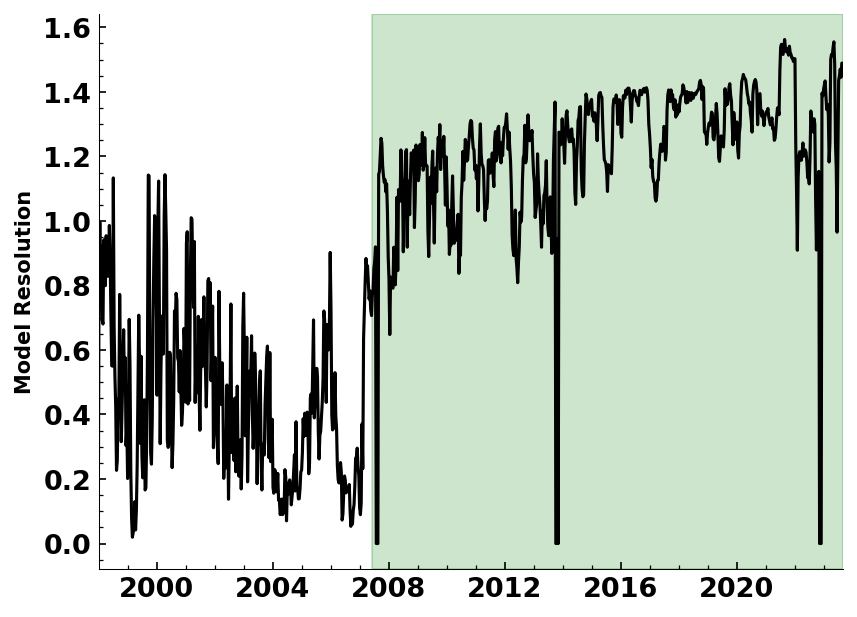

In [ ]:
from seismic.plot.plot_utils import set_mpl_params
set_mpl_params()

date = [UTCDateTime(tt).datetime for tt in t]


# plt.plot(date, np.max(np.reshape(res, (-1, len(date))), axis=0))
# plt.plot(date, res[18, 11], 'k')
plt.plot(date, res2[18, 11], 'k')

plt.ylabel('Model Resolution')
# plt.gca().yaxis.label.set_color('blue')


# plt.twinx()
# plt.ylabel('dv/v [%]')
# # color this y-label red
# plt.gca().yaxis.label.set_color('red')
# plt.plot(datetimes, -100*dv[18, 11, :], color='red', label=r'$\frac{dv}{v}$')# print(res.shape, t.shape)
# plt.savefig(os.path.join(outfolder, f'resolution_{output_param}_{freq0}.pdf'), bbox_inches='tight', transparent=True)
# plt.legend()
# green background color from June 2007 on
plt.axvspan(
    datetime.datetime(2007, 6, 1), max(date),
    color='green', alpha=0.2)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
# turn off ticks where there is no spine
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('left')
plt.xlim(datetime.datetime(1998, 1, 1), max(date))

plt.savefig('/home/pm/Documents_sync/PhD/conferences/AGU23/poster/res_time_series.png', dpi=300, transparent=True, bbox_inches='tight')


In [ ]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt


lat = km2d(y)
lat0 = lat.min()
lon0 = -122.45
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="03s", region=region)


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.021666667
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.365


In [ ]:
from scipy.interpolate import RegularGridInterpolator

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data


lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])

# f = RegularGridInterpolator((lat, lon), res, bounds_error=False, method='linear')

# dv_totalint = f(qcoords)
# dv_totalint = dv_totalint.reshape(latqg.shape)

# dv_total_grid = DataArray(data=res, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')


In [ ]:
# pygmt.config() #'13p')
import os
import pandas as pd

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)

for ii, utc in enumerate(date):
    # compute once every 60 days
    if ii%6 != 0:
        continue
    # find active stations
    slon = [
        lo for lo, stt, et in zip(
        stats.Longitude, stats.StartTime, stats.EndTime) if UTCDateTime(stt) < utc < UTCDateTime(et)]
    slat = [
        lo for lo, stt, et in zip(
        stats.Latitude, stats.StartTime, stats.EndTime) if UTCDateTime(stt) < utc < UTCDateTime(et)]
    f = RegularGridInterpolator((lat, lon), res[:, :, ii], bounds_error=False, method='linear')
    res_now = f(qcoords)
    res_now = res_now.reshape(latqg.shape)
    # res_int_grid = DataArray(data=res_int[:, :, ii], coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')# , indexes=[lon, lat])
    res_int_grid = DataArray(data=res_now, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='res')# , indexes=[lon, lat])

    fig = pygmt.Figure()
    # create colorbar for xarray.DataArray
    pygmt.makecpt(
        cmap="viridis",
        series=f"0/2",
        continuous=True,
        reverse=False,
    )

    persp = [160, 50]
    proj = "M30c"

    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        fig.grdview(
            grid=topo,
            drapegrid=res_int_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            perspective=persp, #160 50
            # cmap='turbo',
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            frame=["xa", "ya", "WSnE"],
            surftype='sm',#m0.01p',
            # cmap='rainbow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief at 1.5 centimeters
            zsize="2c",
            meshpen="0.1p",
            transparency=20
        )
        fig.colorbar(frame=['a0.25', "x+ldv/v", "y+l[%]"],perspective=persp, projection=proj)
        fig.plot(
            x=slon, y=slat, style="i0.7c", color="red", pen="black", transparency=25, perspective=persp, projection=proj)
    os.makedirs(f'{outfolder}/resolution_maps', exist_ok=True)
    fig.savefig(f'{outfolder}/resolution_maps/{freq0}-{freq0*2}_{utc.date()}.png', dpi=100, transparent=True)

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (i

# Local quakes
check for correlations in the dv/v trend and the number of earthquake occurences (and their depths)

In [20]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.core.event.catalog import Catalog
import numpy as np
from obspy import read_events


minmag = -1
try:
    evts = read_events(f'MSH_events_minmag{minmag}.xml')
except FileNotFoundError:
    c = Client('USGS', timeout=240)

    lat = [45.95, 46.45]
    lon = [-122.45, -121.96]


    starttime = UTCDateTime(year=2007, julday=1)
    endtime = UTCDateTime(year=2023, julday=365)
    delta = 86400*365
    rtimes = np.linspace(starttime.timestamp, endtime.timestamp, 12)
    # rtimes = np.arange(starttime.timestamp, endtime.timestamp, delta)
    evts = Catalog()



    for ii, rtime in enumerate(rtimes):
        if ii == len(rtimes)-1:
            break
        start = UTCDateTime(rtime)
        end = UTCDateTime(rtimes[ii+1])
        print(f'downloading events from {start} to {end}')
        evts.extend(c.get_events(
            starttime=start, endtime=end, minmagnitude=minmag, maxdepth=15,
            minlatitude=lat[0], maxlatitude=lat[1], minlongitude=lon[0],
            maxlongitude=lon[1]))
    evts.write(f'MSH_events_minmag{minmag}.xml', format='QUAKEML')

otimes = [evt.preferred_origin().time.datetime for evt in evts]
hypz = [-evt.preferred_origin().depth for evt in evts]


downloading events from 2007-01-01T00:00:00.000000Z to 2008-07-18T08:43:38.181818Z
downloading events from 2008-07-18T08:43:38.181818Z to 2010-02-02T17:27:16.363636Z
downloading events from 2010-02-02T17:27:16.363636Z to 2011-08-21T02:10:54.545455Z
downloading events from 2011-08-21T02:10:54.545455Z to 2013-03-07T10:54:32.727273Z
downloading events from 2013-03-07T10:54:32.727273Z to 2014-09-22T19:38:10.909091Z
downloading events from 2014-09-22T19:38:10.909091Z to 2016-04-09T04:21:49.090909Z
downloading events from 2016-04-09T04:21:49.090909Z to 2017-10-25T13:05:27.272727Z
downloading events from 2017-10-25T13:05:27.272727Z to 2019-05-12T21:49:05.454545Z
downloading events from 2019-05-12T21:49:05.454545Z to 2020-11-27T06:32:43.636364Z
downloading events from 2020-11-27T06:32:43.636364Z to 2022-06-14T15:16:21.818182Z
downloading events from 2022-06-14T15:16:21.818182Z to 2023-12-31T00:00:00.000000Z


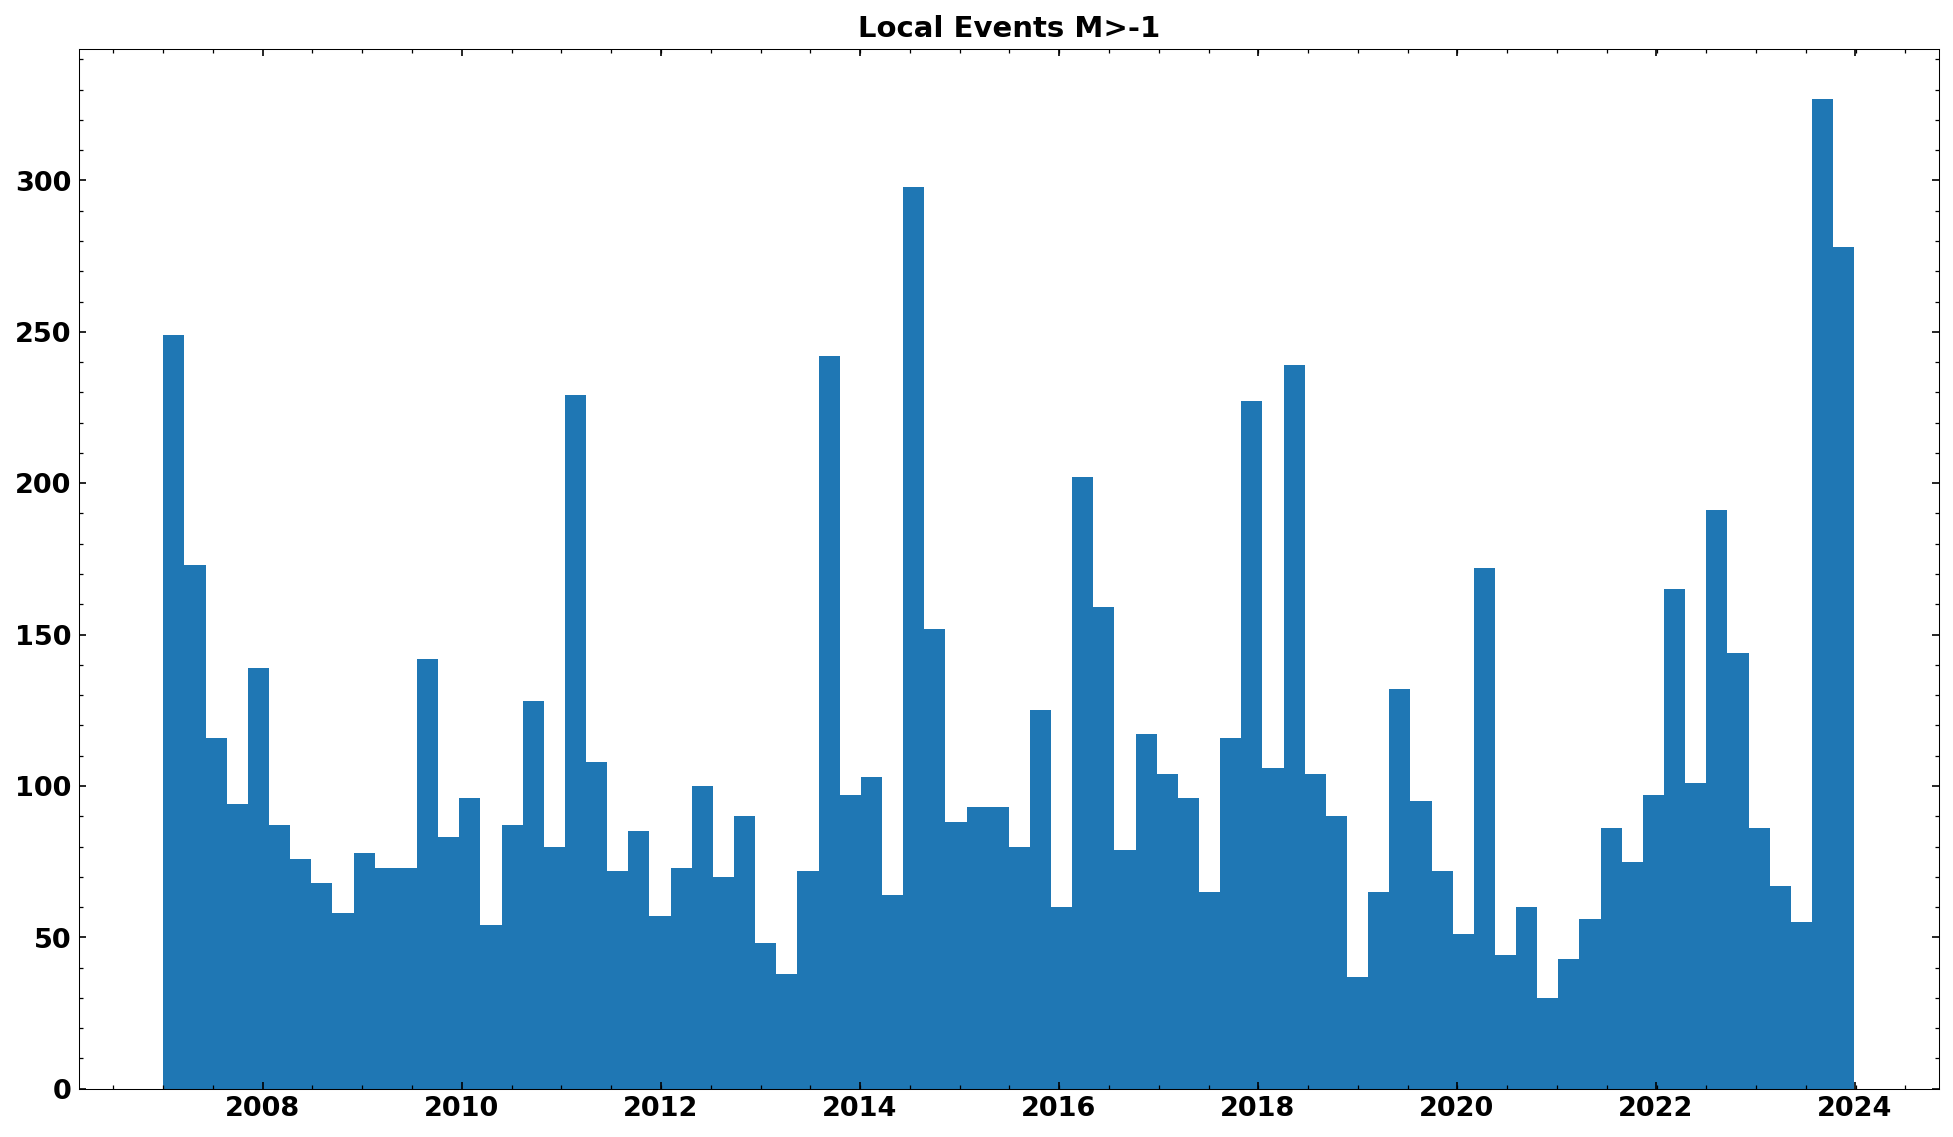

In [21]:
import os
from matplotlib import pyplot as plt

plt.figure(figsize=(16,9))
plt.hist(otimes, 80)
os.makedirs('../figures/events/', exist_ok=True)
plt.title(f'Local Events M>{minmag}')
plt.savefig('../figures/events/event_distr.pdf',facecolor='none')

### plot events vs dv/v curve

In [22]:
# load dv/v data for all frequencies
import glob
import os

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = 0.5
corr_len = 2
std_model = 0.004
dv = {}
for freq0, std_model in zip([0.25, 0.5, 1.0], [0.004, 0.004, 0.004]):
    infile = glob.glob(
        f'/home/pm/Documents_sync/PhD/StHelens/spatial/linearised/new_gap_handling_crosssingle_dvfilt_allcc_cl{corr_len}_std{std_model}_largemap/{freq0}-*/dvdt_3D.npz')[0]

    loaded = np.load(infile)

    x = loaded['xaxis']
    y = loaded['yaxis']
    t = loaded['taxis']
    dvdt = loaded['dv']

    dv[freq0] = -100*dvdt[15, 19]
datetimes = [UTCDateTime(tt).datetime for tt in t]


In [23]:
# compute accumulated moment release in each depth zone

# depth zones depend on the frequency and velocity
vel = 2500
depthzones = {}
for freq0 in [0.25, 0.5, 1.0]:
    depthzones[freq0] = np.arange(0, 2000, 2/3*vel/freq0)
depthzones = np.flip([2000, -2/3*vel+1500, -2/3*vel/0.5+1500, -2/3*vel/0.25+1500])
print(depthzones)

seismic_moment = np.zeros((len(depthzones)-1, len(datetimes)))

# obtain the seismic moment for each event and timestep
for dateidx, date in enumerate(datetimes):
    filt_evts = [evt for evt in evts if abs(evt.preferred_origin().time.datetime-date) < (datetimes[1]-datetimes[0])/2]
    for freq0 in [0.25, 0.5, 1.0]:
        for evt in filt_evts:
            # find the depth zone in which the event occurs
            depth = -evt.preferred_origin().depth
            if depth < depthzones.min() or depth > depthzones.max():
                continue
            depthzone = depthzones[depthzones>=depth].min()
            # find the index of the depth zone
            depthzone_idx = np.where(depthzones==depthzone)[0][0]-1
            # compute the seismic moment
            seismic_moment[depthzone_idx, dateidx] += 10**(1.5*evt.preferred_magnitude().mag+9.1)

# accumulated seismic moment
acc_seismic_moment = np.cumsum(seismic_moment, axis=-1)

[-5166.66666667 -1833.33333333  -166.66666667  2000.        ]


In [24]:
# number of earthquakes in the two discussed periods
high_activity = (datetime.datetime(2013, 1, 1), datetime.datetime(2019, 1, 1))
low_activity = (datetime.datetime(2019, 1, 1), datetime.datetime(2022, 1, 1))

# compute number of earthquakes for the two times
otimes = [evt.preferred_origin().time.datetime for evt in evts]

# for high_activity:
n_eqs_high_activity = len([ot for ot in otimes if high_activity[0] < ot < high_activity[1]])

n_eqs_low_activity = len([ot for ot in otimes if low_activity[0] < ot < low_activity[1]])

# divide by number of years
n_eqs_high_activity /= (high_activity[1]-high_activity[0]).days/365
n_eqs_low_activity /= (low_activity[1]-low_activity[0]).days/365

print(f'Number of earthquakes p.a. in high activity period: {n_eqs_high_activity}')
print(f'Number of earthquakes p.a. in low activity period: {n_eqs_low_activity}')

Number of earthquakes p.a. in high activity period: 560.0775901414879
Number of earthquakes p.a. in low activity period: 346.01733576642334


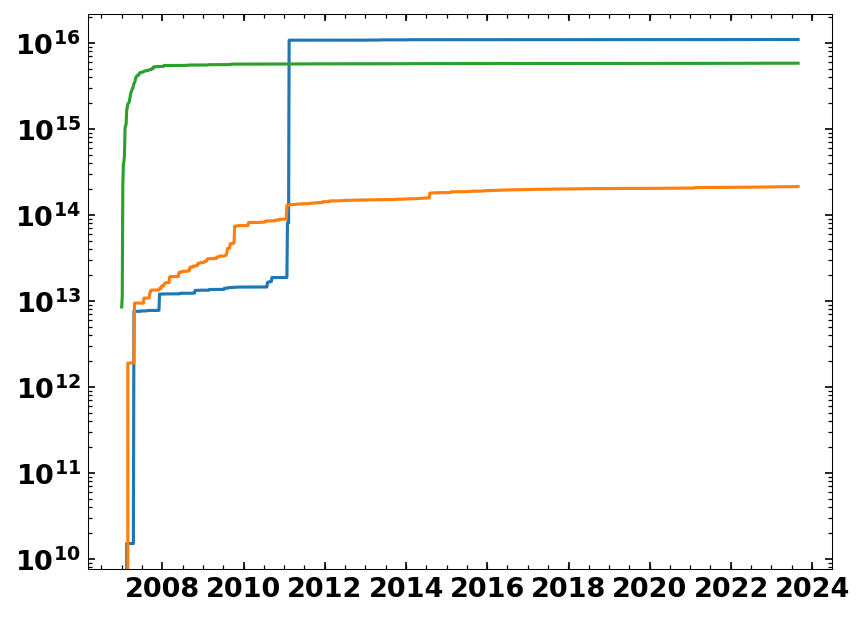

In [25]:
plt.plot(datetimes, acc_seismic_moment[0])
plt.plot(datetimes, acc_seismic_moment[1])
plt.plot(datetimes, acc_seismic_moment[2])
# y-axis logarithmic
plt.yscale('log')

In [26]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

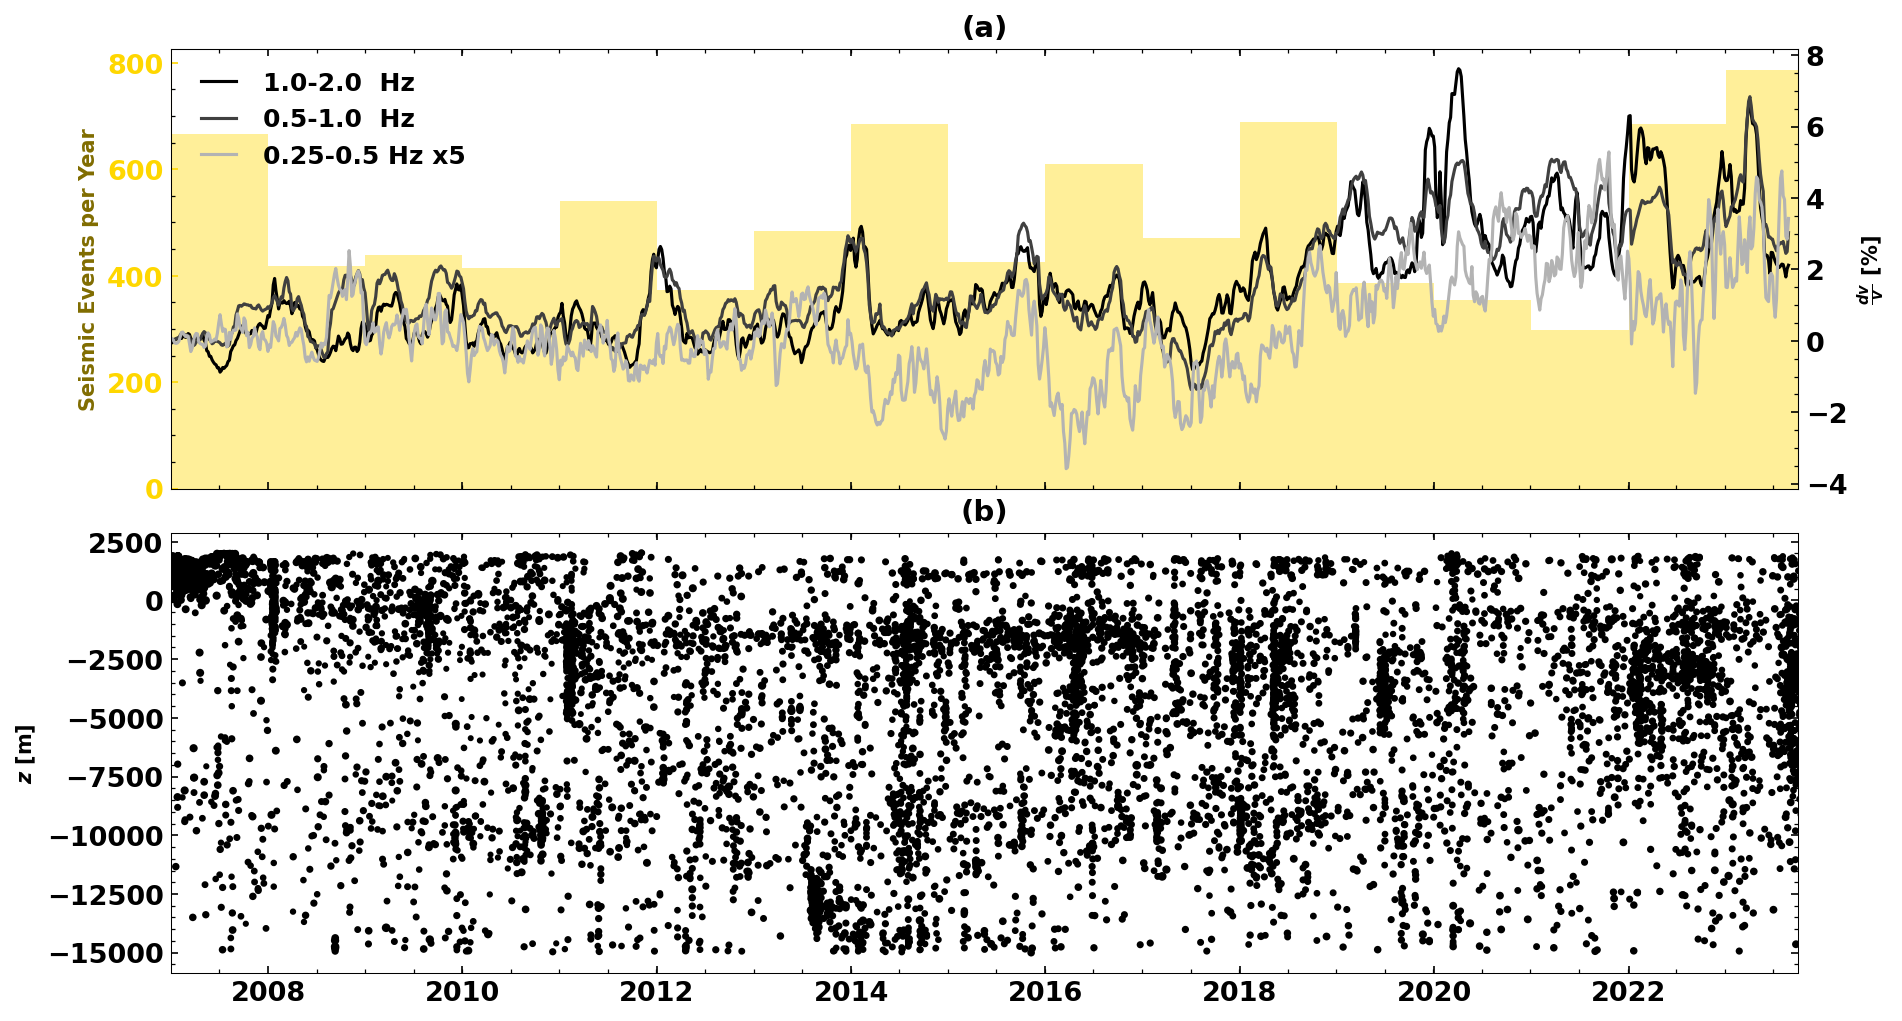

In [44]:
from seismic.plot.plot_utils import set_mpl_params
import datetime
set_mpl_params()

outfolder = os.path.join(os.path.dirname(os.path.dirname(infile)), 'figures')

# plot dv/v for all frequencies

histcol = 'gold'

# # difference
plt.figure(figsize=(14, 8))
ax0 = plt.subplot(2,1,1)

# plt.hist(otimes, 80, alpha=0.7, zorder=1);
plt.ylabel('Seismic Events per Year')

# plot accumulated seismic moment
# for ii, col in enumerate(colors):
#     plt.plot(
#         datetimes, acc_seismic_moment[ii], color=col, zorder=0)
# plot cumulative number of events
bins = [datetime.datetime(i, 1, 1) for i in np.arange(2007, 2025)]
otimes2 = [evt.preferred_origin().time.datetime for evt in evts if (evt.preferred_origin().depth < 2 and evt.preferred_origin().time.datetime > datetime.datetime(2009, 6, 1))]
otimes2.sort()
# plt.plot(otimes2, np.cumsum(np.ones(len(otimes2))), color='r', zorder=0)
plt.hist(otimes, bins, zorder=1, color=histcol, histtype='stepfilled', alpha=.4);
# plt.ylabel(r'$M_0$ [Nm]', color='r')
# plt.yscale('log')
plt.twinx()
colors = ['k', 'C1', 'C2']
for freq0, lighten_amount in zip([1.0, 0.5, 0.25], [1, .75, .3]):
    # plt.plot(
        # datetimes, dv[freq0]-dv_hpf[freq0], label=r'$f_{min}$ = '+f'{freq0} Hz, '+r'$\sigma$ = '+f'{std_model} '+r'$\frac{km}{km^2}$, $\lambda$ = 3 km', color=col,zorder=5)
    # plt.plot(
    #     datetimes[1:], np.diff(dv[freq0]-dv_hpf[freq0]), color=col,zorder=5)
    col = lighten_color('k', lighten_amount)
    if freq0 == 0.25:
        plt.plot(
            datetimes, dv[freq0]*5, label=f'{freq0}-{2*freq0} Hz x5',
            zorder=2, color=col)
        continue
    plt.plot(
        datetimes, dv[freq0], color=col,zorder=2, label=f'{freq0}-{2*freq0}  Hz')

# limit tick location to the right axis
ax01 = plt.gca()
ax01.yaxis.set_label_position("right")
ax01.yaxis.tick_right()

    
plt.ylabel(r'$\frac{dv}{v}$ [%]')
plt.legend()



ax1 = plt.subplot(2,1,2, sharex=ax0)
plt.ylabel(r'$z$ [m]')

# plot earthquake depths
hypz = [-evt.preferred_origin().depth for evt in evts]
plt.scatter(otimes, hypz, s=[(evt.preferred_magnitude().mag+3.1)*1.6 for evt in evts], color='k')


# ticks red
ax0.yaxis.label.set_color(lighten_color(histcol, 1.5))
ax0.spines['left'].set_color(histcol)  # Set spine color to red
ax0.tick_params(axis='y', colors=histcol)  # Set tick color to red

# remove the gap between the subplots
plt.subplots_adjust(hspace=0.1)
# titles
ax0.set_title('(a)')
ax1.set_title('(b)')

# remove upper x-label
plt.setp(ax0.get_xticklabels(), visible=False)

plt.xlim(datetime.datetime(2007, 1, 1), datetime.datetime(2023, 10, 1))

plt.savefig(f'/home/pm/Documents_sync/PhD/seminars/SPIN seminar/n_evts_dv_{freq0}_depth.png', bbox_inches='tight', facecolor='None')
plt.savefig(f'/home/pm/Documents_sync/PhD/StHelens/paper/figures/n_evts_dv.pdf', bbox_inches='tight', facecolor='None')


